In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [26]:
bay_county_codes = ['001', '013', '097', '095', '081', '085', '0750', '041', '055']
bay_county_names = ["Alameda", "ContraCosta", "Sonoma", "Solano", "SanMateo", "SantaClara", "SanFrancisco", "Marin","Napa"] 
regression_file_path = '/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/data/regression/'



#### Demographic Data Processing


In [27]:
ACS_2009_demog = pd.read_csv(regression_file_path+'2009ACSdemvars_bay.csv')
ACS_2009_demog.head()

,Geoid,Percent of population 25 years and over with Bachelor's degree,% below poverty level,% Single Family,% Owner Occupied,Percent NH White alone,Percent NH Black or African African alone,Percent NH Asian alone,Percent Hispanic,Total number of housing units,Median home value,Median income
0,6001400100,0.345,0.031,0.912439,0.895260,0.769150,0.041435,0.110724,0.007312,1439,1000000.0,186439.0
1,6001400200,0.376,0.000,0.665236,0.657428,0.767823,0.022640,0.069364,0.106936,932,909500.0,122647.0
2,6001400300,0.321,0.069,0.478758,0.405179,0.714142,0.099114,0.075544,0.085214,2801,718100.0,66638.0
3,6001400400,0.440,0.040,0.555446,0.433809,0.698082,0.092588,0.078143,0.062988,2020,790500.0,80391.0
4,6001400500,0.281,0.060,0.444380,0.437722,0.419526,0.346635,0.066241,0.115988,1735,572000.0,50658.0


#### Get total number and percentages of loans data from HMDA files

Universe: all of the CTs in the 9 county bay area that had loan activity during 2009

In [28]:
filepath = '/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/data/parsed_data_1/'
counties = ['Alameda', 'ContraCosta', 'Napa', 'SanMateo', 'SanFrancisco', 'Marin', 'Solano', 'SantaClara', 'Sonoma']
# recovery_1 = ['2013', '2014']

Alameda = pd.DataFrame()
ContraCosta = pd.DataFrame()
Napa = pd.DataFrame()
Marin = pd.DataFrame()
SanMateo = pd.DataFrame()    
SanFrancisco = pd.DataFrame()    
SantaClara = pd.DataFrame()
Solano = pd.DataFrame()    
Sonoma = pd.DataFrame()



for year in ['2009']:
    df = pd.read_csv(filepath+'Alameda_'+year+'_parsed.csv')
    df["Total Loans"] = df['# HI borrower, LI tract'] + df['# HI borrower, HI tract']+ df['# LI borrower, LI tract']
    + df['# LI borrower, HI tract']
    df["Geoid"] = df["Tract"].apply(lambda x: int(x*100 + 6001000000))
    Alameda = pd.concat([Alameda, df]).reset_index(drop=True).groupby("Geoid")["Total Loans"].sum()

    df = pd.read_csv(filepath+'ContraCosta_'+year+'_parsed.csv')
    df["Total Loans"] = df['# HI borrower, LI tract'] + df['# HI borrower, HI tract']+ df['# LI borrower, LI tract']
    + df['# LI borrower, HI tract']
    df["Geoid"] = df["Tract"].apply(lambda x: int(x*100 + 6013000000))
    ContraCosta = pd.concat([ContraCosta, df]).reset_index(drop=True).groupby("Geoid")["Total Loans"].sum()

    df = pd.read_csv(filepath+'Napa_'+year+'_parsed.csv')
    df["Total Loans"] = df['# HI borrower, LI tract'] + df['# HI borrower, HI tract']+ df['# LI borrower, LI tract']
    + df['# LI borrower, HI tract']
    df["Geoid"] = df["Tract"].apply(lambda x: int(x*100 + 6055000000))
    Napa = pd.concat([Napa, df]).reset_index(drop=True).groupby("Geoid")["Total Loans"].sum()

    df = pd.read_csv(filepath+'Marin_'+year+'_parsed.csv')
    df["Total Loans"] = df['# HI borrower, LI tract'] + df['# HI borrower, HI tract']+ df['# LI borrower, LI tract']
    + df['# LI borrower, HI tract']
    df["Geoid"] = df["Tract"].apply(lambda x: int(x*100 + 6041000000))
    Marin = pd.concat([Marin, df]).reset_index(drop=True).groupby("Geoid")["Total Loans"].sum()

    df = pd.read_csv(filepath+'SanMateo_'+year+'_parsed.csv')
    df["Total Loans"] = df['# HI borrower, LI tract'] + df['# HI borrower, HI tract']+ df['# LI borrower, LI tract']
    + df['# LI borrower, HI tract']
    df["Geoid"] = df["Tract"].apply(lambda x: int(x*100 + 6081000000))
    SanMateo = pd.concat([SanMateo, df]).reset_index(drop=True).groupby("Geoid")["Total Loans"].sum()

    df = pd.read_csv(filepath+'SanFrancisco_'+year+'_parsed.csv')
    df["Total Loans"] = df['# HI borrower, LI tract'] + df['# HI borrower, HI tract']+ df['# LI borrower, LI tract']
    + df['# LI borrower, HI tract']
    df["Geoid"] = df["Tract"].apply(lambda x: int(x*100 + 6075000000))
    SanFrancisco = pd.concat([SanFrancisco, df]).reset_index(drop=True).groupby("Geoid")["Total Loans"].sum()

    df = pd.read_csv(filepath+'Solano_'+year+'_parsed.csv')
    df["Total Loans"] = df['# HI borrower, LI tract'] + df['# HI borrower, HI tract']+ df['# LI borrower, LI tract']
    + df['# LI borrower, HI tract']
    df["Geoid"] = df["Tract"].apply(lambda x: int(x*100 + 6095000000))
    Solano = pd.concat([Solano, df]).reset_index(drop=True).groupby("Geoid")["Total Loans"].sum()

    df = pd.read_csv(filepath+'SantaClara_'+year+'_parsed.csv')
    df["Total Loans"] = df['# HI borrower, LI tract'] + df['# HI borrower, HI tract']+ df['# LI borrower, LI tract']
    + df['# LI borrower, HI tract']
    df["Geoid"] = df["Tract"].apply(lambda x: int(x*100 + 6085000000))
    SantaClara = pd.concat([SantaClara, df]).reset_index(drop=True).groupby("Geoid")["Total Loans"].sum()

    Sonoma = pd.read_csv(filepath+'Sonoma_'+year+'_parsed.csv')
    df["Total Loans"] = df['# HI borrower, LI tract'] + df['# HI borrower, HI tract']+ df['# LI borrower, LI tract']
    + df['# LI borrower, HI tract']
    Sonoma["Geoid"] = Sonoma["Tract"].apply(lambda x: int(x*100 + 6097000000))
    Sonoma = pd.concat([Sonoma, df]).reset_index(drop=True).groupby("Geoid")["Total Loans"].sum()

counties = [Alameda.to_frame(), ContraCosta.to_frame(), Napa.to_frame(), Marin.to_frame(), SanMateo.to_frame(), SanFrancisco.to_frame(),Solano.to_frame(),SantaClara.to_frame(), Sonoma.to_frame()]

bay_counties_loans_09 = pd.concat(counties).reset_index()
bay_counties_loans_09.head()
print("number of observations/tracts in loans data", len(bay_counties_loans_09))



number of observations/tracts in loans data 1733


/Users/ameliabaum/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



#### Merge Loans Data with demographic variables (all tracts)


In [29]:
allvars_loans_09 = pd.merge(ACS_2009_demog, bay_counties_loans_09, how="inner", on="Geoid")
print("number of observations/tracts before neighbors merge", len(allvars_loans_09))
allvars_loans_09.head()

number of observations/tracts before neighbors merge 1733


,Geoid,Percent of population 25 years and over with Bachelor's degree,% below poverty level,% Single Family,% Owner Occupied,Percent NH White alone,Percent NH Black or African African alone,Percent NH Asian alone,Percent Hispanic,Total number of housing units,Median home value,Median income,Total Loans
0,6001400100,0.345,0.031,0.912439,0.895260,0.769150,0.041435,0.110724,0.007312,1439,1000000.0,186439.0,54.0
1,6001400200,0.376,0.000,0.665236,0.657428,0.767823,0.022640,0.069364,0.106936,932,909500.0,122647.0,20.0
2,6001400300,0.321,0.069,0.478758,0.405179,0.714142,0.099114,0.075544,0.085214,2801,718100.0,66638.0,58.0
3,6001400400,0.440,0.040,0.555446,0.433809,0.698082,0.092588,0.078143,0.062988,2020,790500.0,80391.0,47.0
4,6001400500,0.281,0.060,0.444380,0.437722,0.419526,0.346635,0.066241,0.115988,1735,572000.0,50658.0,57.0


In [30]:
nonans = allvars_loans_09.dropna()

print("number of non-nan obs: ", len(nonans)) #all of these Nans are coming from demog vars, which makes sense.


number of non-nan obs:  1717


#### Merge Demographic features with neighbors dataframe to contribute CRA eligibility information by tract and exclude CTs without oppositely coded neighbors

Universe: all of the CTs in the 9 county bay area that had loan activity have oppositely coded neighbors. The boolean_tracts_all_2009.csv file includes all the tracts that have oppositely coded neighbors and their CRA eligibility.



In [31]:
data_path = '/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/data/neighbors/'
cra_elig_neighbors_09 = pd.read_csv(data_path+ 'boolean_tracts_all_2009.csv')
# cra_elig_neighbors_09
# print("num all tracts in the HMDA data that have at least one oppositely coded neighbor", len(cra_elig_neighbors_10))
# cra_elig_neighbors_10.head()

#### County Fixed Effects

In [32]:
demog_with_cra = pd.merge(nonans, cra_elig_neighbors_09, how='inner', right_on='Geoid', left_on="Geoid")
#inner bc only want the tracts that are in the demog variables and represented in the neighbors set
demog_with_cra['CRA'] = demog_with_cra['CRA Eligible'].apply(lambda x: 1 if x == 'eligible' else 0)
print("num all tracts in the HMDA data that have at least one oppositely coded neighbor", len(demog_with_cra))
demog_with_cra.head()


num all tracts in the HMDA data that have at least one oppositely coded neighbor 976


,Geoid,Percent of population 25 years and over with Bachelor's degree,% below poverty level,% Single Family,% Owner Occupied,Percent NH White alone,Percent NH Black or African African alone,Percent NH Asian alone,Percent Hispanic,Total number of housing units,Median home value,Median income,Total Loans,Year_x,Tract_y,type,County,CRA Eligible,CRA
0,6001400100,0.345,0.031,0.912439,0.895260,0.769150,0.041435,0.110724,0.007312,1439,1000000.0,186439.0,54.0,2009,4001.0,high,Alameda County,not eligible,0
1,6001400300,0.321,0.069,0.478758,0.405179,0.714142,0.099114,0.075544,0.085214,2801,718100.0,66638.0,58.0,2009,4003.0,mid,Alameda County,not eligible,0
2,6001400400,0.440,0.040,0.555446,0.433809,0.698082,0.092588,0.078143,0.062988,2020,790500.0,80391.0,47.0,2009,4004.0,mid,Alameda County,not eligible,0
3,6001400500,0.281,0.060,0.444380,0.437722,0.419526,0.346635,0.066241,0.115988,1735,572000.0,50658.0,57.0,2009,4005.0,mod,Alameda County,eligible,1
4,6001400600,0.519,0.264,0.632653,0.470756,0.338305,0.473150,0.032220,0.059666,784,586700.0,39802.0,31.0,2009,4006.0,mod,Alameda County,eligible,1


In [33]:
# create county dummies and find which county to drop
demog_with_cra.to_csv("/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/data/regression/demog_no_dummies_2009.csv",index=False)

demog_with_cra_dummies = pd.get_dummies(demog_with_cra, columns=["County"])
for col in (demog_with_cra_dummies.iloc[:,18:]):
    print(col, sum(demog_with_cra_dummies[col])) #drop napa with n=18
    
demog_with_cra_dummies.to_csv("/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/data/regression/demog_with_cra_dummies_2009.csv",index=False)



County_Alameda County 171
County_Contra Costa County 90
County_Marin County 22
County_Napa County 18
County_San Francisco County 121
County_San Mateo County 79
County_Santa Clara County 370
County_Solano County 59
County_Sonoma County 46


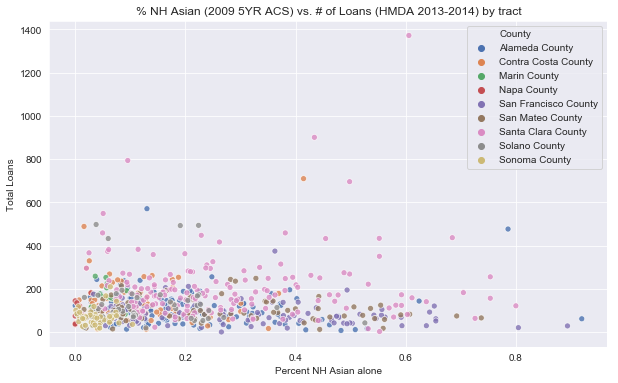

In [230]:
plt.figure(figsize=(10,6))

plt.title('% NH Asian (2009 5YR ACS) vs. # of Loans (HMDA 2013-2014) by tract')
plot = sns.scatterplot(allvars_2009['Percent NH Asian alone'], allvars_2009['Total Loans'],
     hue = allvars_2009["County"], legend='brief', markers='p', palette= "deep", alpha=0.8);          
plt.legend(bbox_to_anchor=(1, 1), loc=1);

plt.savefig('/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/results/plots/nha_vs_loans_rec1.png')


In [231]:
LI = allvars_2009[allvars_2009['CRA'] == 1]
HI = allvars_2009[allvars_2009['CRA'] == 0]


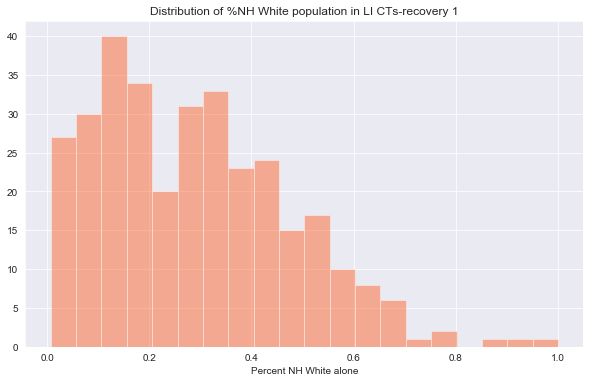

In [232]:
plt.figure(figsize=(10,6))
plt.title('Distribution of %NH White population in LI CTs-recovery 1')
sns.distplot(LI['Percent NH White alone'], kde=False, color='orangered', bins=20);
plt.savefig('/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/results/plots/LI_nhw_dist_rec1.png')

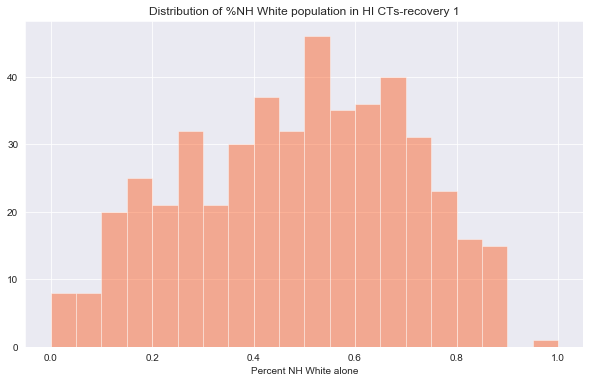

In [233]:
plt.figure(figsize=(10,6))

plt.title('Distribution of %NH White population in HI CTs-recovery 1')
sns.distplot(HI['Percent NH White alone'], kde=False, color='orangered', bins=20);
plt.savefig('/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/results/plots/HI_nhw_dist_rec1.png')

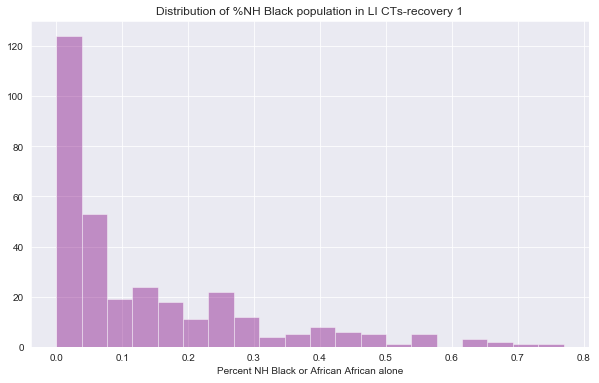

In [234]:
plt.figure(figsize=(10,6))
plt.title('Distribution of %NH Black population in LI CTs-recovery 1')
sns.distplot(LI['Percent NH Black or African African alone'], color='purple', kde=False, bins=20);
plt.savefig('/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/results/plots/LI_nhb_dist_rec1.png')

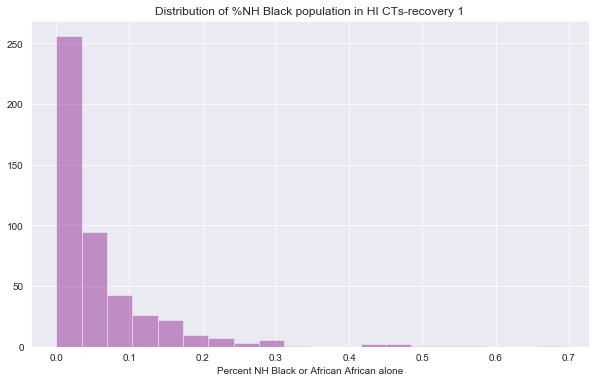

In [235]:
plt.figure(figsize=(10,6))
plt.title('Distribution of %NH Black population in HI CTs-recovery 1')
sns.distplot(HI['Percent NH Black or African African alone'], color='purple', kde=False, bins=20);

plt.savefig('/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/results/plots/HI_nhb_dist_rec1.png')

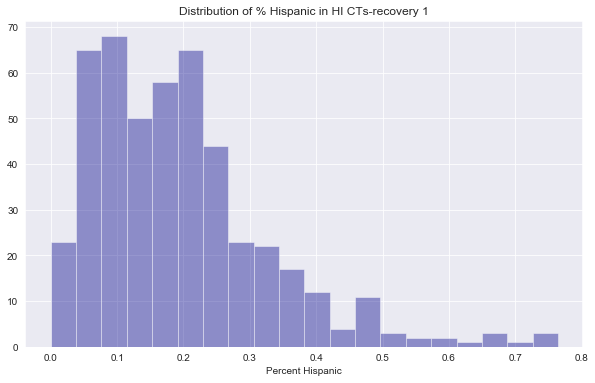

In [236]:
plt.figure(figsize=(10,6))
plt.title('Distribution of % Hispanic in HI CTs-recovery 1')
sns.distplot(HI['Percent Hispanic'], color='darkblue', kde=False, bins=20);
plt.savefig('/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/results/plots/HI_hispanic_dist_rec1.png')

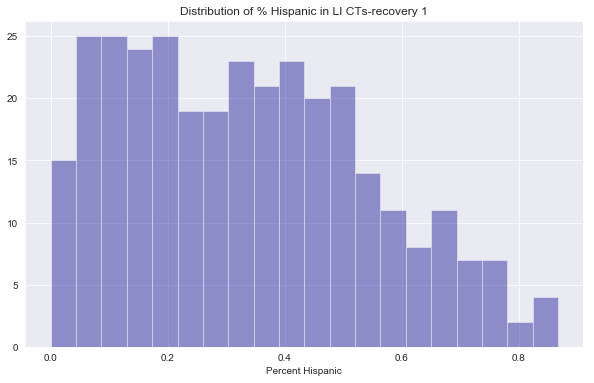

In [237]:
plt.figure(figsize=(10,6))
plt.title('Distribution of % Hispanic in LI CTs-recovery 1')
sns.distplot(LI['Percent Hispanic'], color='darkblue', kde=False, bins=20);
plt.savefig('/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/communityreinvestmentact/results/plots/LI_hispanic_dist_rec1.png')